In [1]:
import numpy as np
from hal import Hal_Matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from test import *


In [2]:
matplotlib.rcParams.update({'font.size': 18})

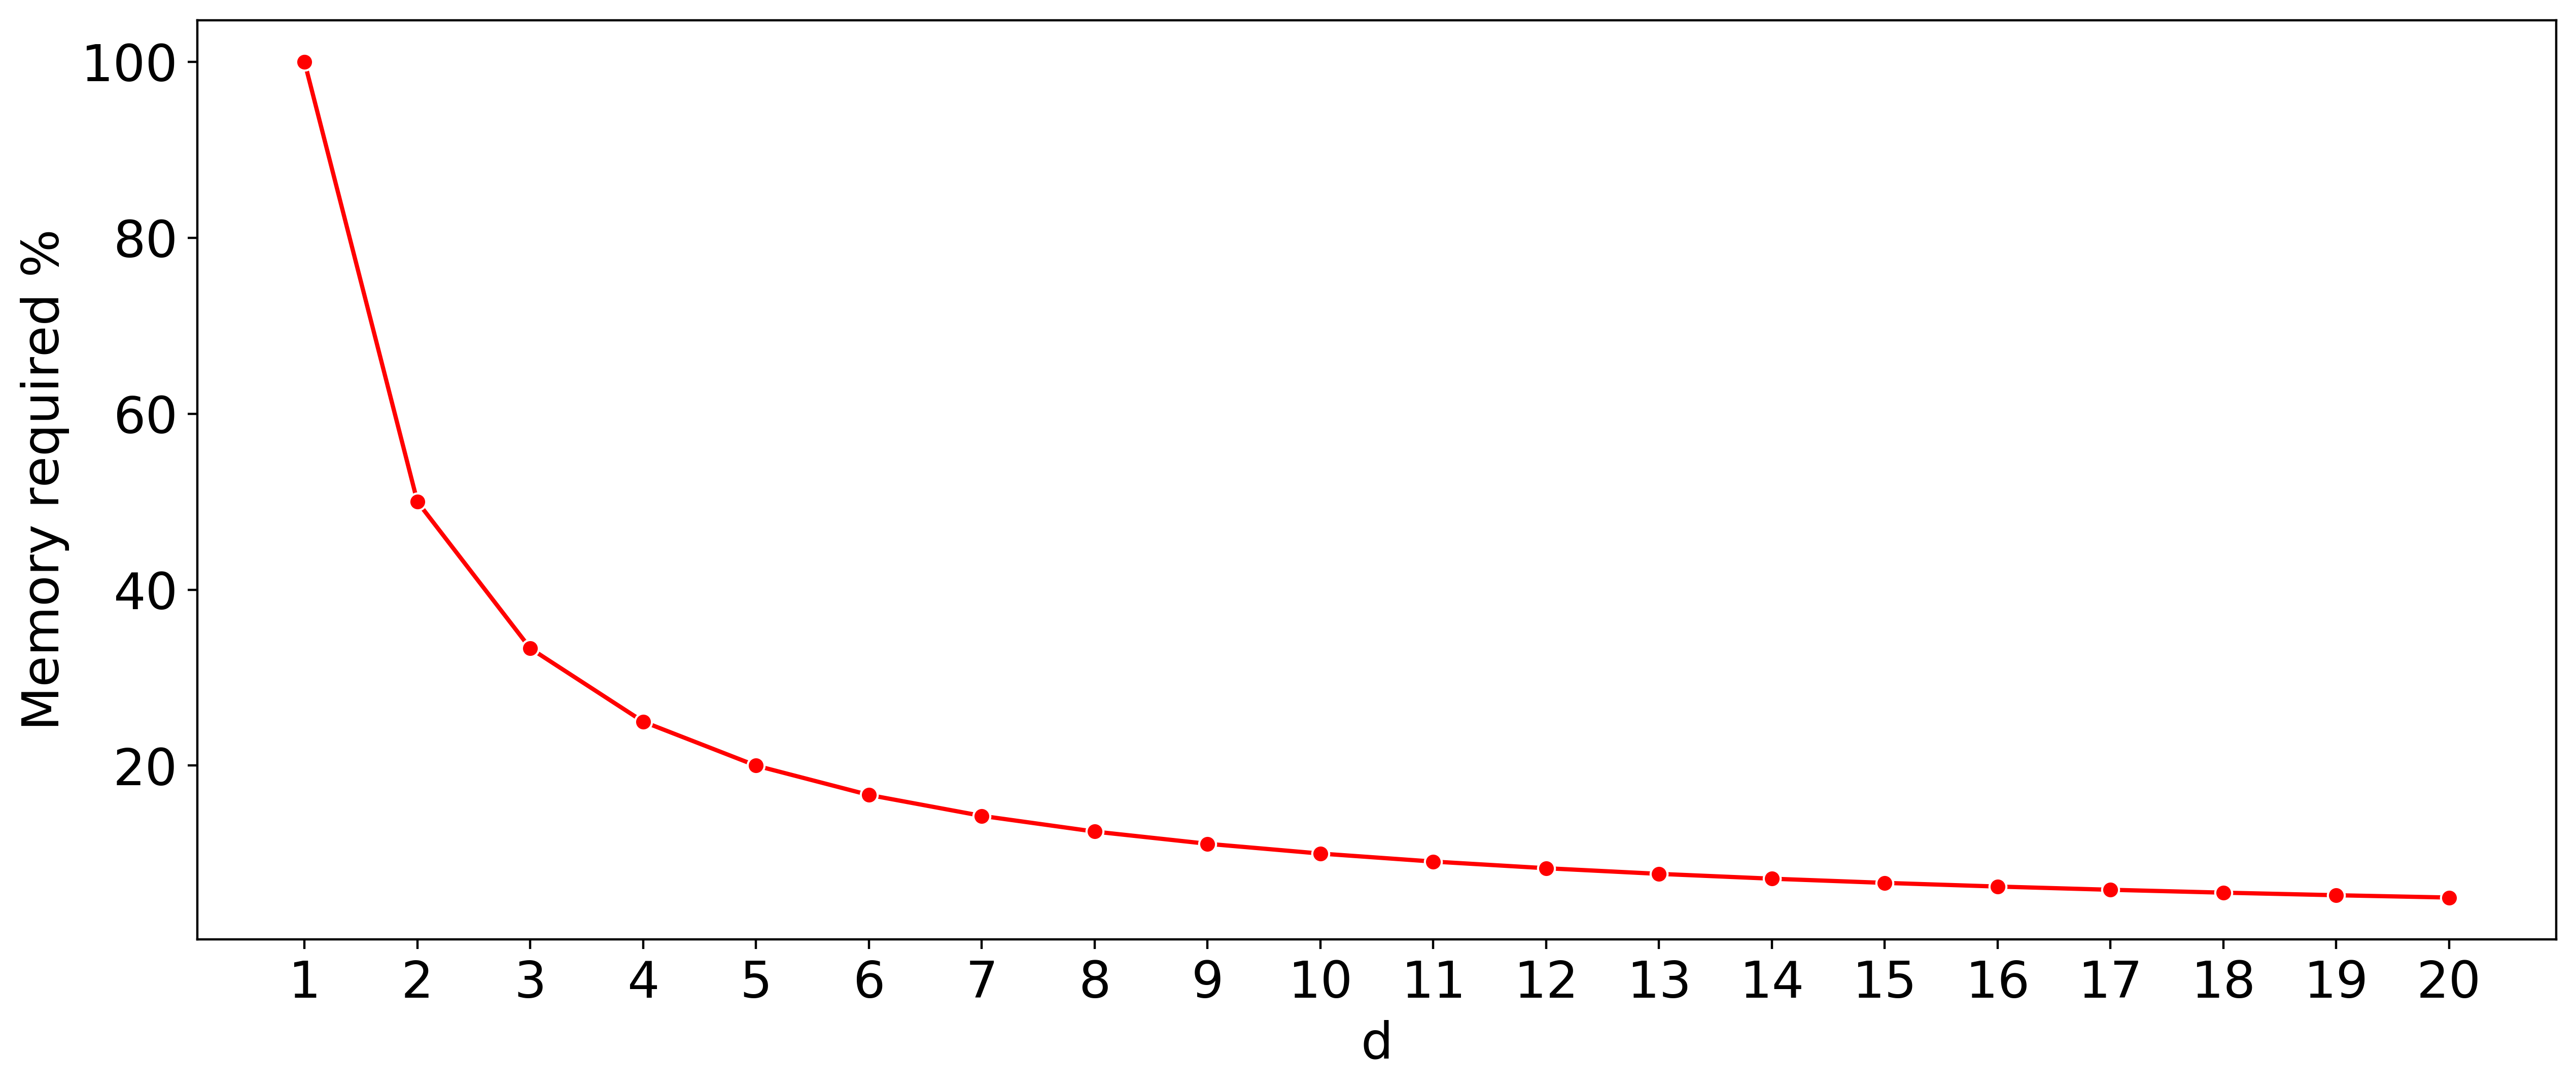

In [3]:
size, reduced_size = [], []
for d in range(1,21):
    n = 50
    size.append((n**2)*(d**2))
    reduced_size.append(1/d)
reduced_size = np.array(reduced_size) * 100
fig = plt.figure(figsize=(15,6),dpi=400)
# fig.suptitle('Memory Requirements of Hal_Matrix (n=50)', fontsize=16)
sns.lineplot(x=range(1,21), y=reduced_size, color='red', marker='o')
plt.ylabel('Memory required %')
plt.xlabel('d')
plt.xticks(range(1,21), range(1,21))
plt.savefig('tex/graphs/memory2.png', bbox_inches='tight')


In [4]:
df = pd.read_csv('comparision.csv', index_col=0)
df

,n,d,dot_hal_time,dot_numpy_time,add_hal_time,add_numpy_time,sub_hal_time,sub_numpy_time,mul_hal_time,mul_numpy_time
0,25,25,0.010046,0.931725,0.000069,0.001493,0.000135,0.001558,0.000046,0.001652
1,25,50,0.004954,8.674227,0.000099,0.003344,0.000256,0.004517,0.000072,0.004289
2,25,75,0.006104,67.488293,0.000242,0.013285,0.000649,0.010695,0.000099,0.009621
3,50,25,0.031142,8.023500,0.000137,0.002018,0.000249,0.002012,0.000100,0.002197
4,50,50,0.029888,120.275021,0.000222,0.013008,0.000518,0.014052,0.000213,0.016015
5,50,75,0.036728,629.601945,0.000321,0.029743,0.000900,0.029876,0.000299,0.029389
6,75,25,0.062720,51.439627,0.000950,0.009007,0.001476,0.007712,0.000641,0.008924
7,75,50,0.099815,663.571359,0.000525,0.037378,0.001052,0.037132,0.000440,0.038248
8,75,75,0.125829,2640.301450,0.000651,0.059755,0.001446,0.059876,0.000612,0.059081
0,100,50,0.370253,NaN,0.000737,NaN,0.001593,NaN,0.000684,NaN


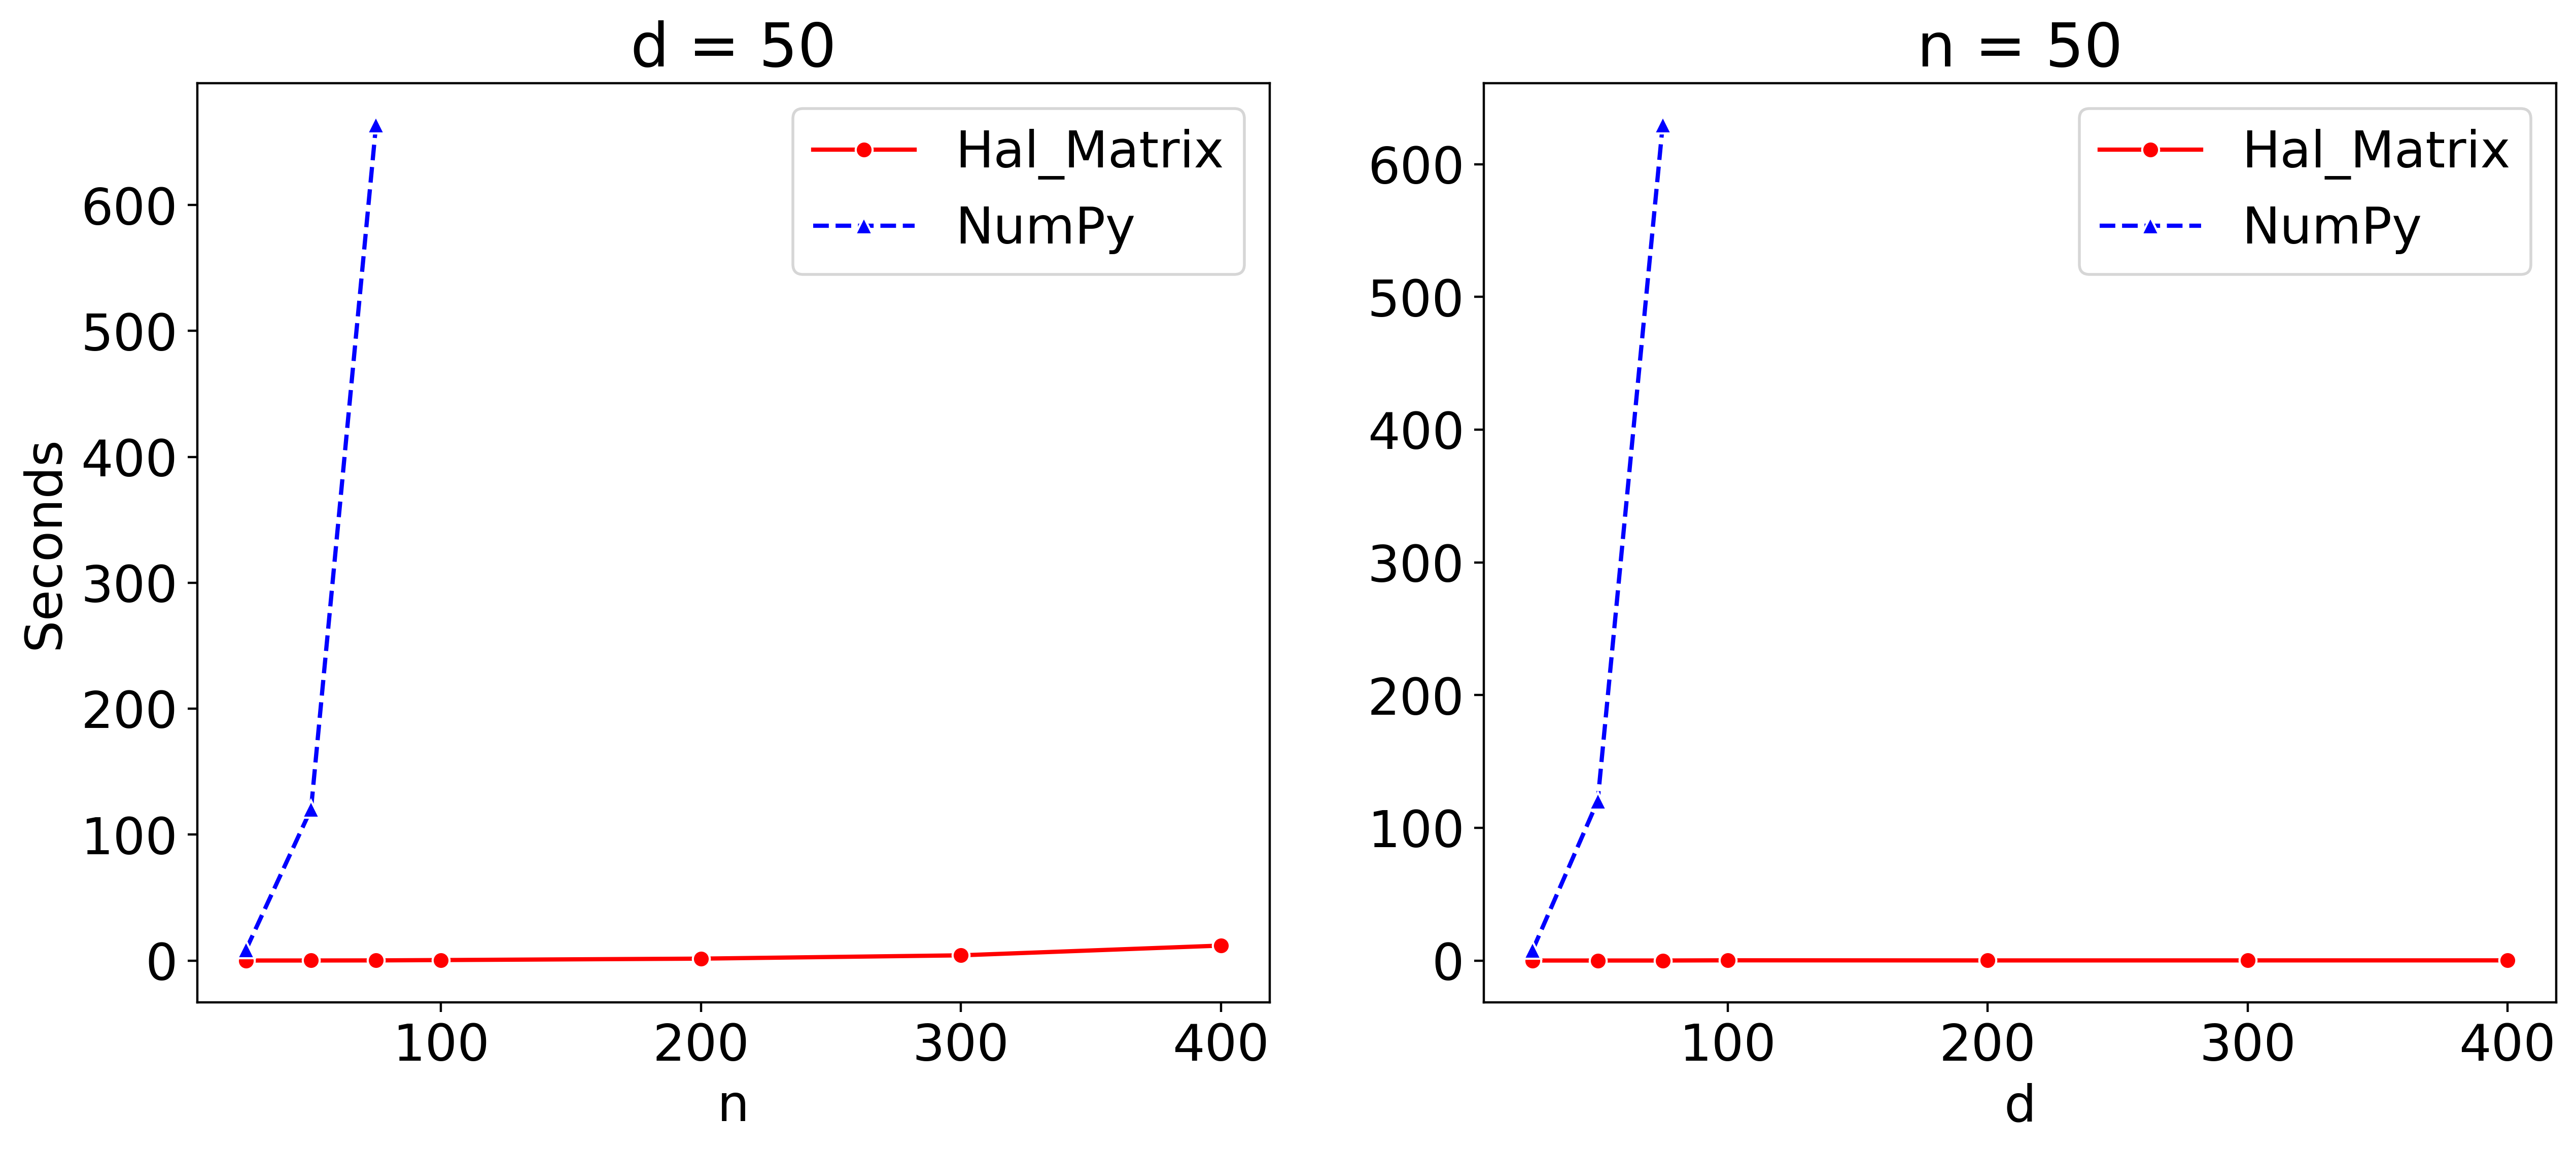

In [5]:
fig = plt.figure(figsize=(15,6),dpi=400)
# fig.suptitle('Time taken to calculate dot product (in seconds)', fontsize=16)
ax1=fig.add_subplot(121)
ax1.set_title('d = 50')
sns.lineplot(data=df.query("d == '50'"), x='n', y='dot_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("d == '50'"), x='n', y='dot_numpy_time', color='blue', marker='^')
ax1.lines[1].set_linestyle("--")
ax1.legend(['Hal_Matrix','NumPy'])
ax1.set_ylabel('Seconds')
ax1.set_xlabel('n')
ax2=fig.add_subplot(122)
ax2.set_title('n = 50')
sns.lineplot(data=df.query("n == '50'"), x='d', y='dot_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("n == '50'"), x='d', y='dot_numpy_time', color='blue', marker='^')
ax2.lines[1].set_linestyle("--")
ax2.legend(['Hal_Matrix','NumPy'])
ax2.set_ylabel('')
ax2.set_xlabel('d')
plt.savefig('tex/graphs/dot2.png', bbox_inches='tight')

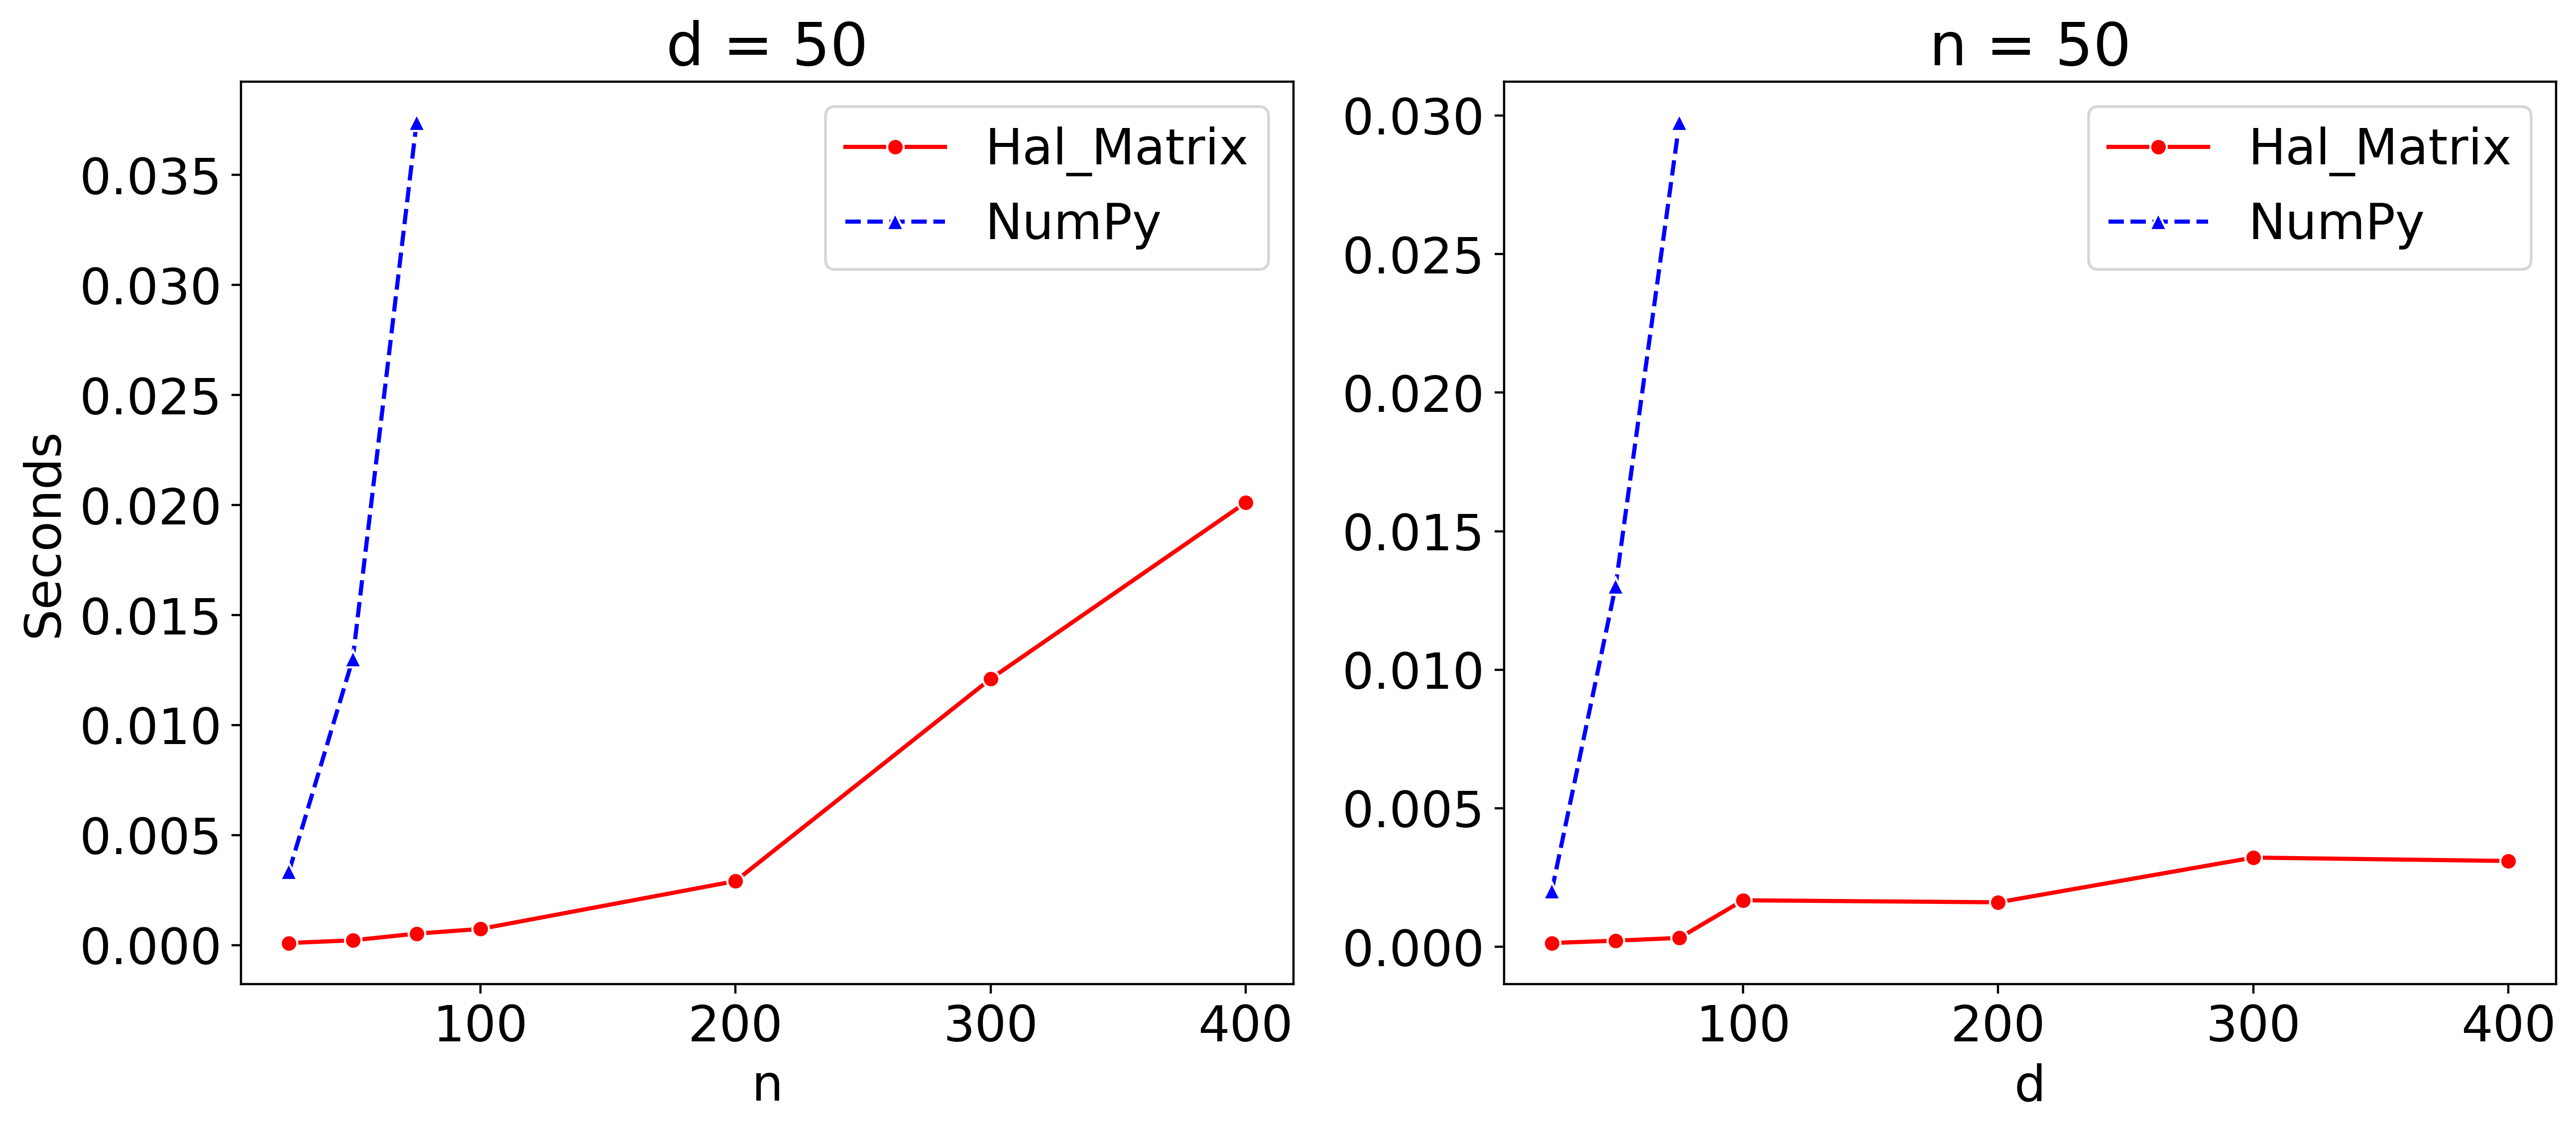

In [6]:
fig = plt.figure(figsize=(15,6),dpi=400)
# fig.suptitle('Time taken to add two matrix (in seconds)', fontsize=16)
ax1=fig.add_subplot(121)
ax1.set_title('d = 50')
sns.lineplot(data=df.query("d == '50'"), x='n', y='add_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("d == '50'"), x='n', y='add_numpy_time', color='blue', marker='^')
ax1.lines[1].set_linestyle("--")
ax1.legend(['Hal_Matrix','NumPy'])
ax1.set_ylabel('Seconds')
ax1.set_xlabel('n')
ax2=fig.add_subplot(122)
ax2.set_title('n = 50')
sns.lineplot(data=df.query("n == '50'"), x='d', y='add_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("n == '50'"), x='d', y='add_numpy_time', color='blue', marker='^')
ax2.lines[1].set_linestyle("--")
ax2.legend(['Hal_Matrix','NumPy'])
ax2.set_ylabel('')
ax2.set_xlabel('d')
plt.savefig('tex/graphs/add2.png', bbox_inches='tight')

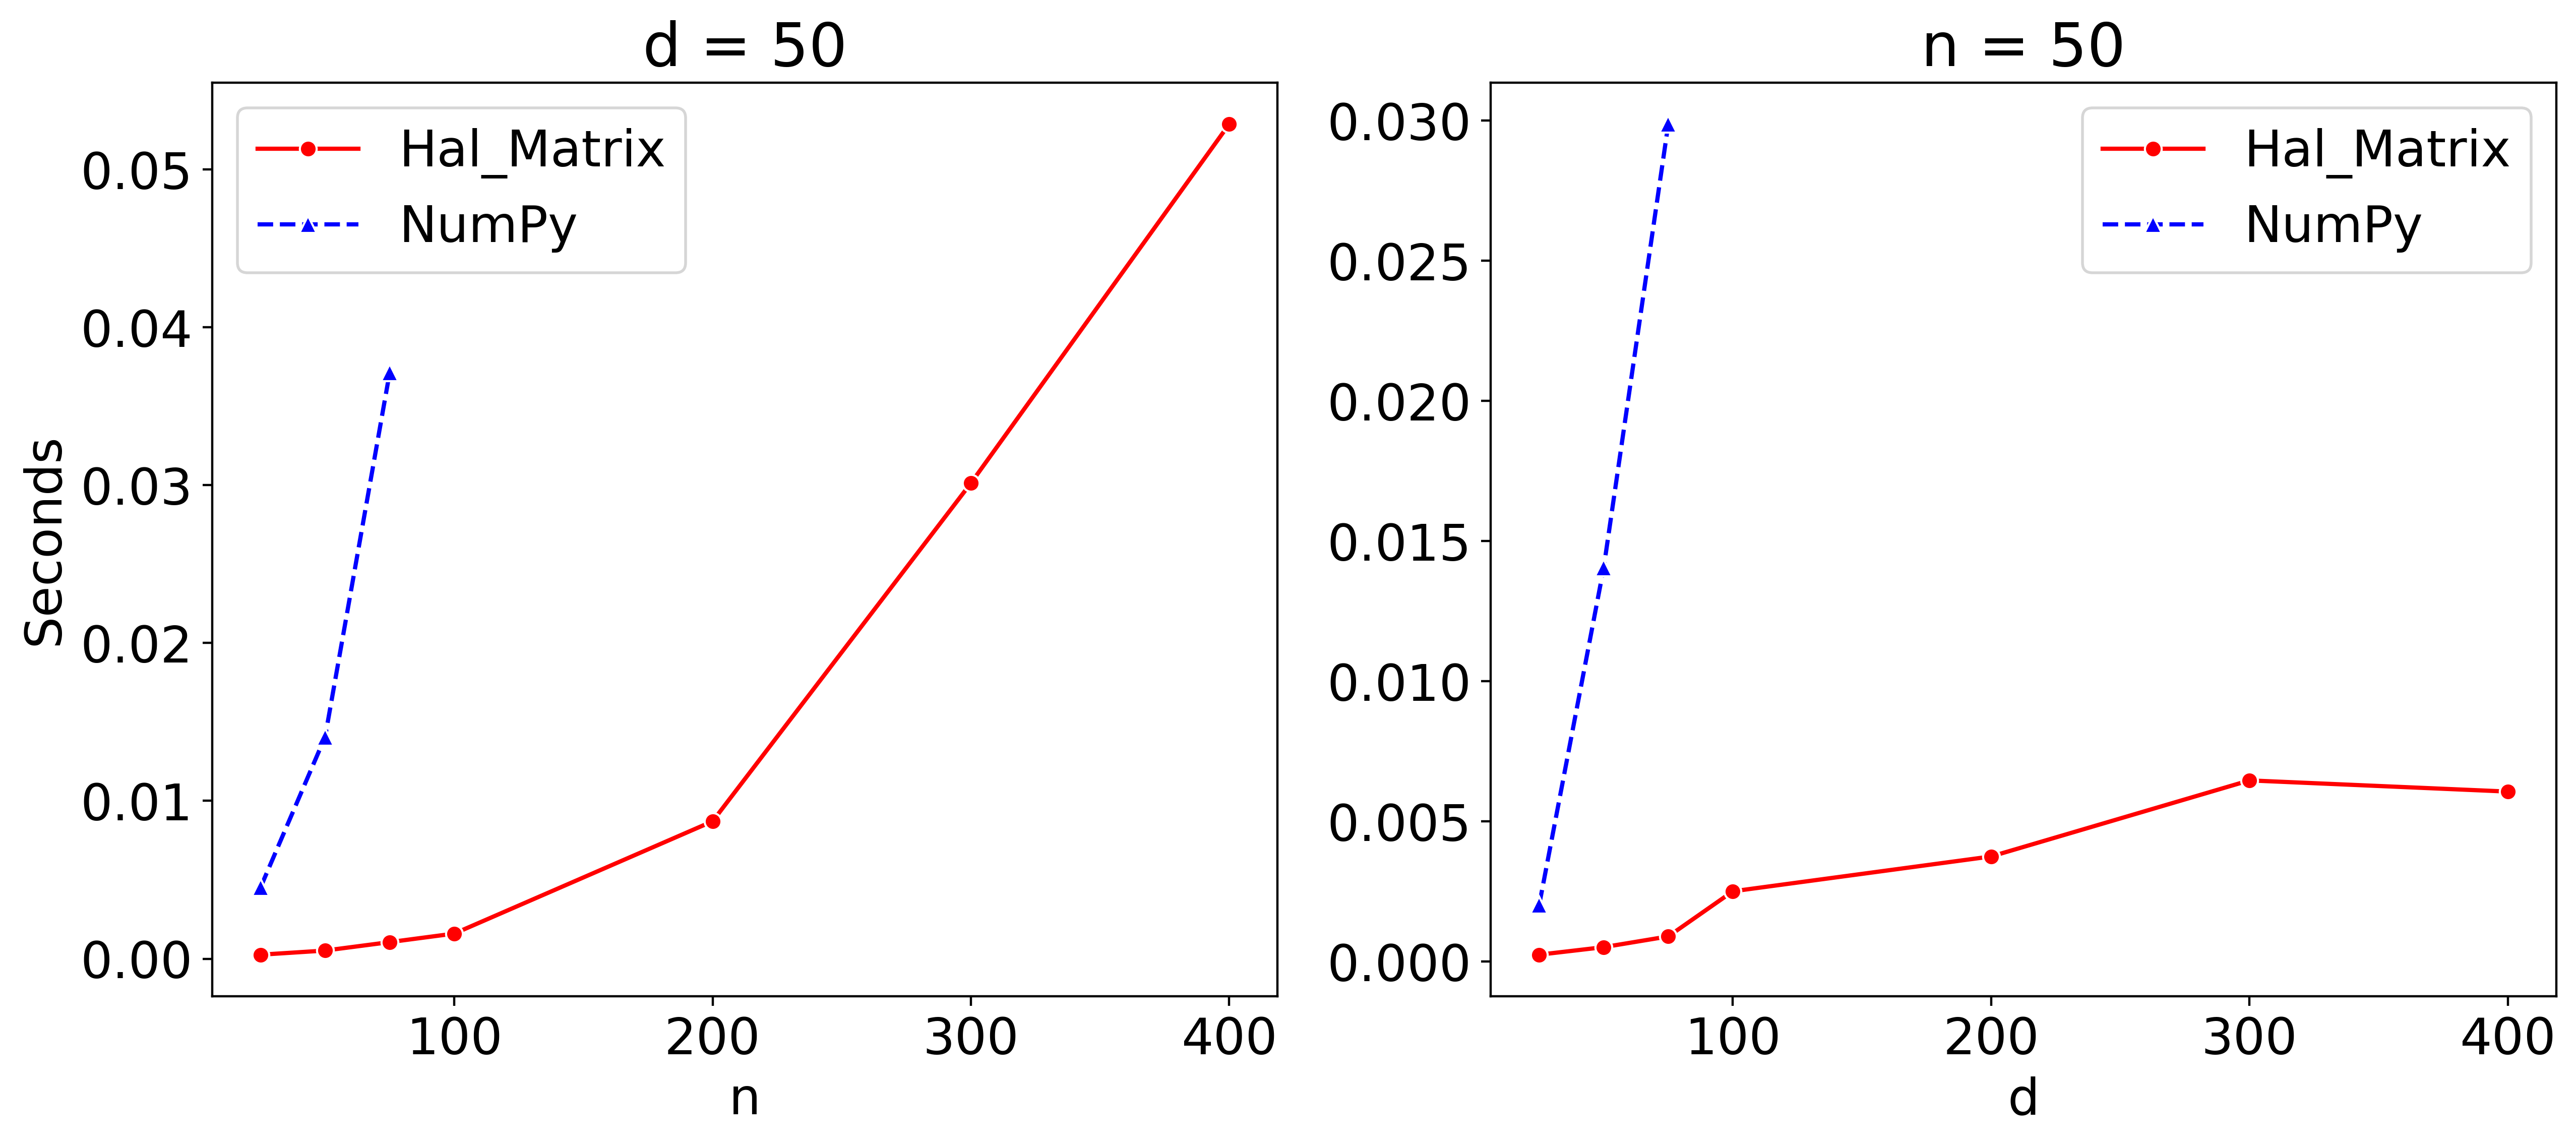

In [7]:
fig = plt.figure(figsize=(15,6),dpi=400)
# fig.suptitle('Time taken to subtract one matrix from another (in seconds)', fontsize=16)
ax1=fig.add_subplot(121)
ax1.set_title('d = 50')
sns.lineplot(data=df.query("d == '50'"), x='n', y='sub_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("d == '50'"), x='n', y='sub_numpy_time', color='blue', marker='^')
ax1.lines[1].set_linestyle("--")
ax1.legend(['Hal_Matrix','NumPy'])
ax1.set_ylabel('Seconds')
ax1.set_xlabel('n')
ax2=fig.add_subplot(122)
ax2.set_title('n = 50')
sns.lineplot(data=df.query("n == '50'"), x='d', y='sub_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("n == '50'"), x='d', y='sub_numpy_time', color='blue', marker='^')
ax2.lines[1].set_linestyle("--")
ax2.legend(['Hal_Matrix','NumPy'])
ax2.set_ylabel('')
ax2.set_xlabel('d')
plt.savefig('tex/graphs/sub2.png', bbox_inches='tight')

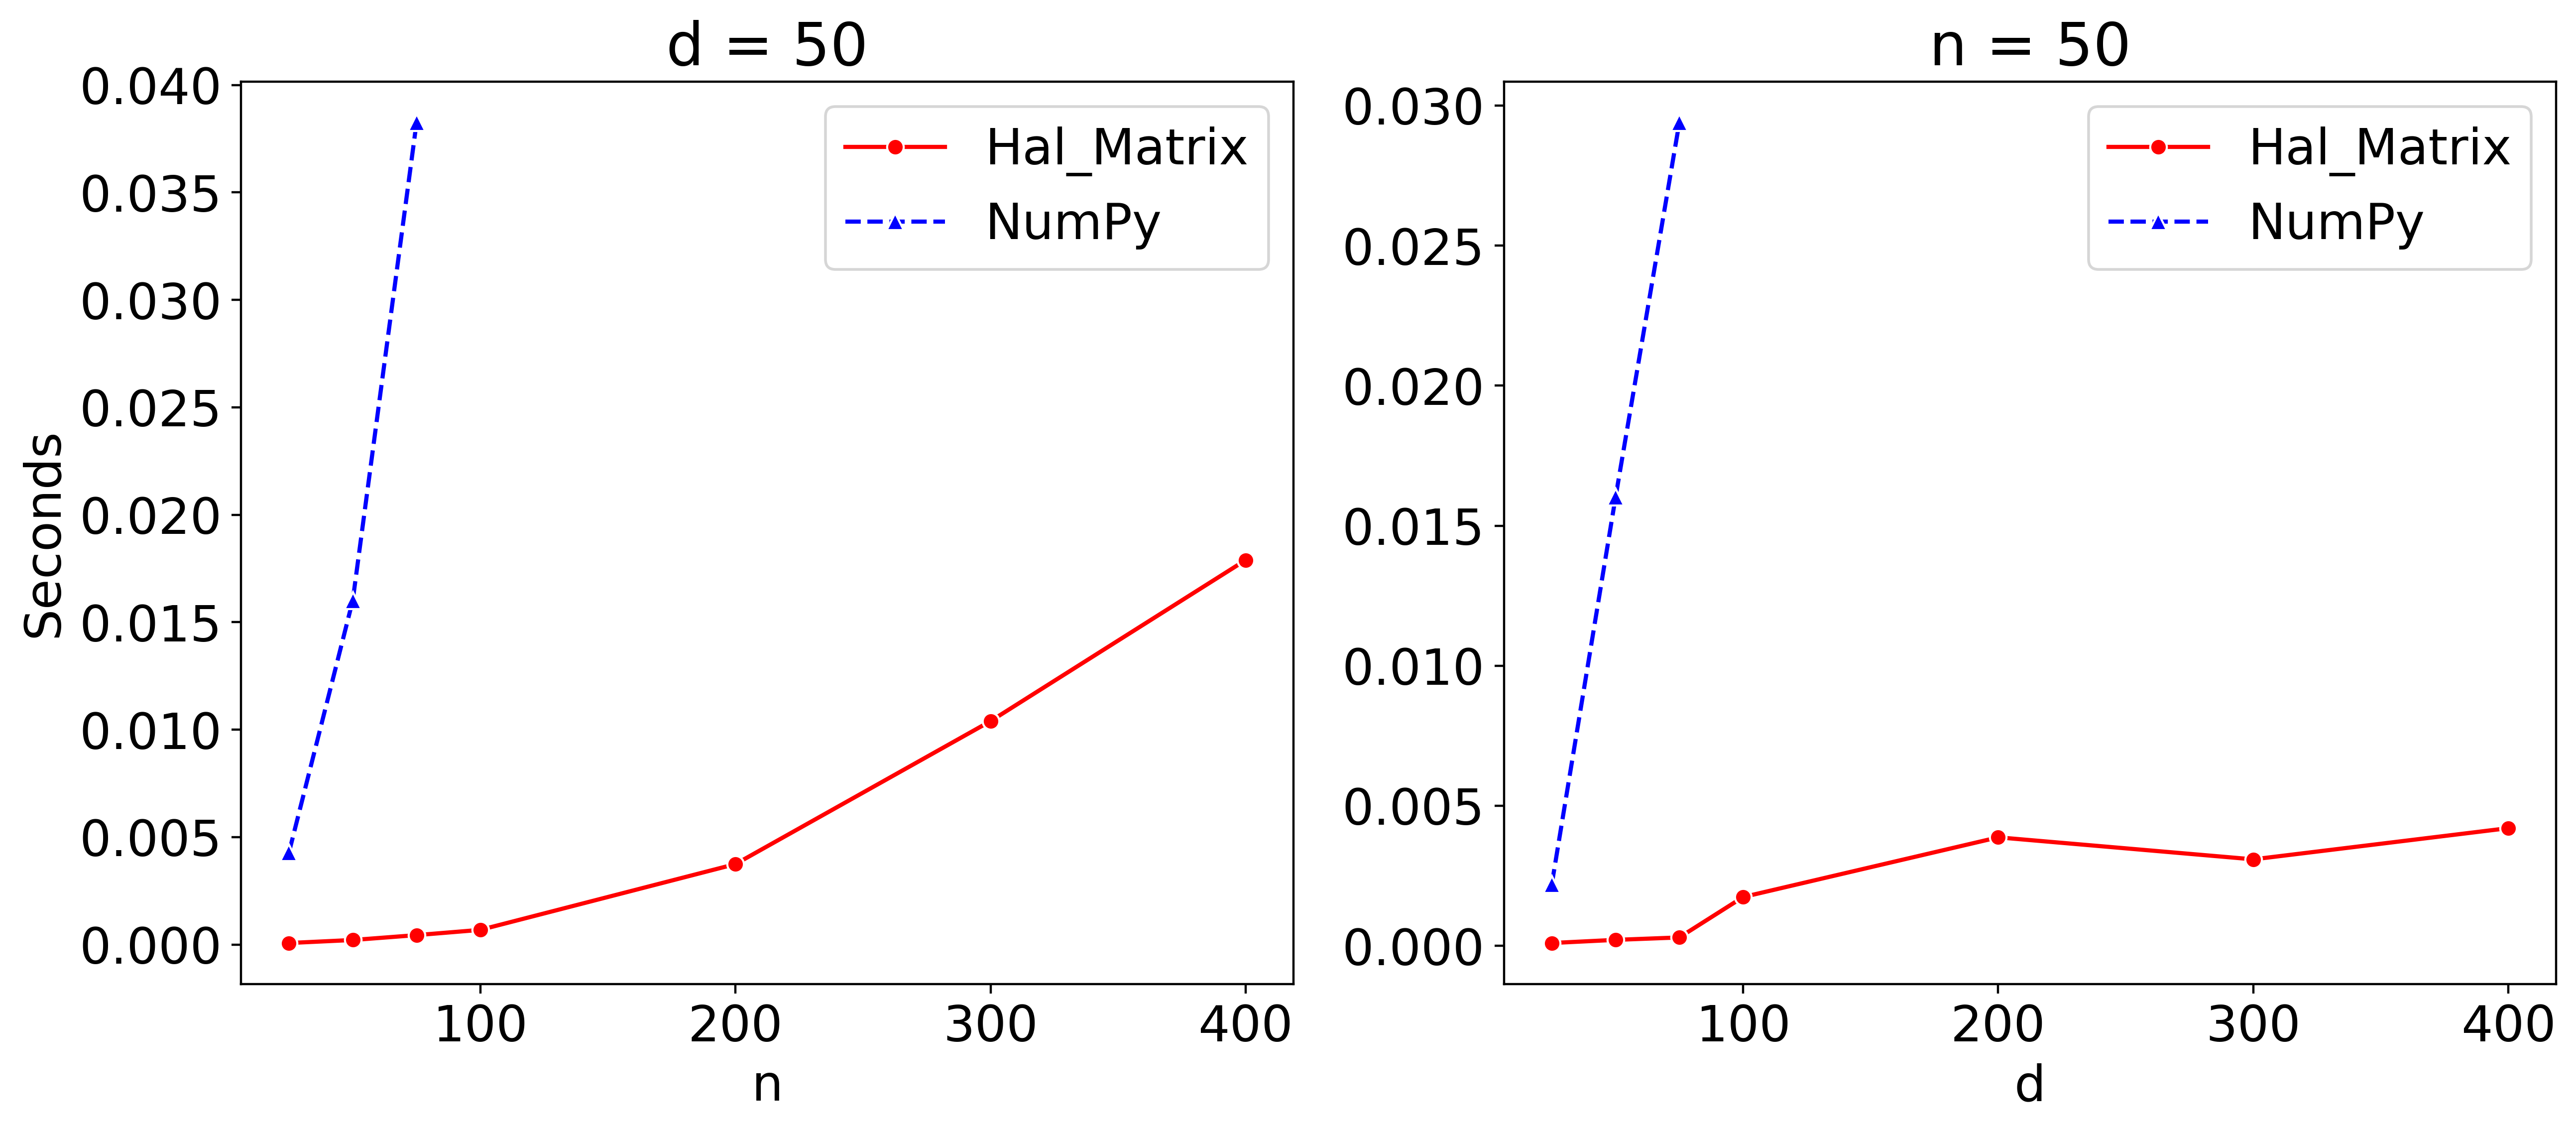

In [8]:
fig = plt.figure(figsize=(15,6),dpi=400)
# fig.suptitle('Time taken to perform element wise multiplication in two matrix (in seconds)', fontsize=16)
ax1=fig.add_subplot(121)
ax1.set_title('d = 50')
sns.lineplot(data=df.query("d == '50'"), x='n', y='mul_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("d == '50'"), x='n', y='mul_numpy_time', color='blue', marker='^')
ax1.lines[1].set_linestyle("--")
ax1.legend(['Hal_Matrix','NumPy'])
ax1.set_ylabel('Seconds')
ax1.set_xlabel('n')
ax2=fig.add_subplot(122)
ax2.set_title('n = 50')
sns.lineplot(data=df.query("n == '50'"), x='d', y='mul_hal_time', color='red', marker='o')
sns.lineplot(data=df.query("n == '50'"), x='d', y='mul_numpy_time', color='blue', marker='^')
ax2.lines[1].set_linestyle("--")
ax2.legend(['Hal_Matrix','NumPy'])
ax2.set_ylabel('')
ax2.set_xlabel('d')
plt.savefig('tex/graphs/mul2.png', bbox_inches='tight')